In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import os
from IPython.display import display
import networkx as nx

In [2]:
df_martix = pd.read_csv('./study_data/cities_gzh_aja_martix.csv')
df_citys = pd.read_csv('./study_data/sa340.csv')
df_martix.set_index('city', inplace=True)

# Citation statistics

In [3]:
# 全局统计每个城市被其他城市提及的次数
# in-count
def show_tj_in_count():
    df_data = []
    for i in list(df_citys['name']):
        result = sum(list(df_martix[i]))
        df_data.append([i, result])
        
    df = pd.DataFrame(df_data, columns=['cityname', 'in-count'])
    df = df.sort_values(by=['in-count'], ascending=False)
    df.to_csv('./study_data/all_cities_in_count.csv', index=None)
    return df
    
    
# 全局 out-count
def show_tj_out_count():
    df_data = []
    for i in list(df_citys['name']):
        result = sum(list(df_martix.loc[i]))
        df_data.append([i, result])
        
    df = pd.DataFrame(df_data, columns=['cityname', 'out-count'])
    df = df.sort_values(by=['out-count'], ascending=False)
    df.to_csv('./study_data/all_cities_out_count.csv', index=None)
    return df
    
# 全局统计，包含in-count和out-count    
def show_tj_in_out_count():
    df_data = []
    for i in list(df_citys['name']):
        _in = sum(list(df_martix[i]))
        _out = sum(list(df_martix.loc[i]))
        _sum = _in + _out
        _sub = _in - _out

        df_data.append([i, _in, _out, _sum, _sub])
        
    df = pd.DataFrame(df_data, columns=['cityname', 'in-count','out-count', 'sum-count', 'sub-count'])
    df = df.sort_values(by=['sub-count'], ascending=False)
    df.to_csv('./study_data/all_cities_in_out_count.csv', index=None)
    return df
    

# city A的out-count
#查询A提及的其他城市
# （city A, other City）
# name == city A
def show_one_city_2_other_city(name):
    data_row = df_martix.loc[name]
    city_names = df_martix.columns.values.tolist()
    data = []
    for i in city_names:
        data.append((i, data_row[i]))
    df = pd.DataFrame(data, columns=['cityname', 'count'])
    return df.sort_values(by=['count'], ascending=False)
    
# city A的in-count
# 查询 other City 提及A
# （other City， city A）
# name == city A
def show_other_city_2_one_city(name):
    df = df_martix[[name]].sort_values(by=[name], ascending=False)
    df = df.reset_index().rename(columns={'city': 'cityname', name:'count'})
    return df

In [4]:
show_tj_in_count()
show_tj_out_count()
df = show_tj_in_out_count()
df

,cityname,in-count,out-count,sum-count,sub-count
335,北京市,36899,836,37735,36063
337,上海市,22841,3197,26038,19644
207,广州市,12751,783,13534,11968
333,香港特别行政区,9056,161,9217,8895
194,深圳市,11783,3292,15075,8491
...,...,...,...,...,...
171,荆州市,525,3516,4041,-2991
239,眉山市,879,4142,5021,-3263
296,平凉市,506,5475,5981,-4969
62,双鸭山市,247,5278,5525,-5031


/Users/wanglihua/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


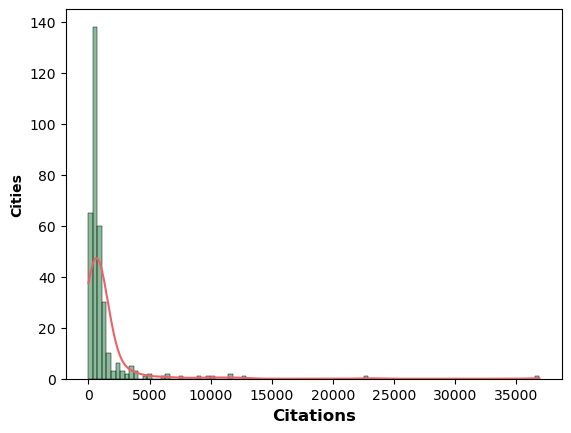

In [5]:
COLOR  = '#177939' 
LINE_COLOR = '#ED6168'
ax2 = sns.histplot(df, x='in-count', color=COLOR, kde=True, bins=100, legend=False)
ax2.lines[0].set_color(LINE_COLOR)
ax2.set_xlabel('Citations', fontdict={'weight': 600, 'size':12})
ax2.set_ylabel('Cities', fontdict={'weight': 600})
ax2.figure.savefig('./study_data/figs/cites_dist.pdf', dpi=600, bbox_inches = 'tight')